In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

In [3]:
df=pd.read_csv(r'C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\Logistic Regression\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

DATA has no missing values and duplicates.

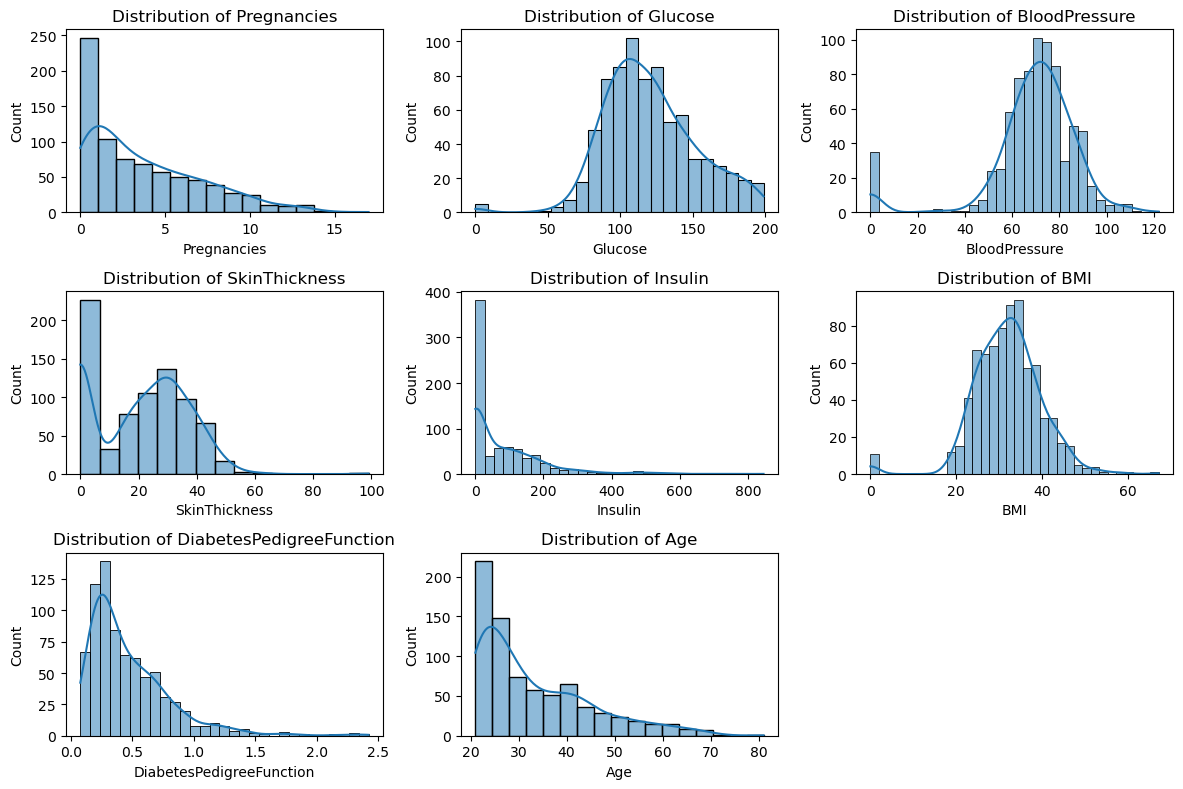

In [9]:
num_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

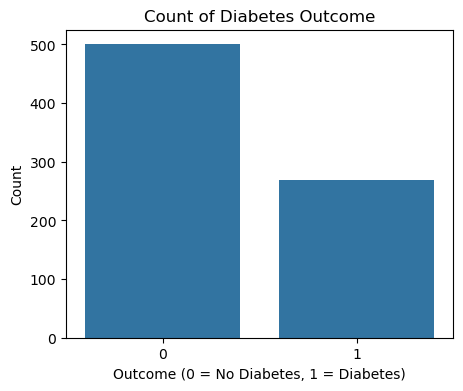

In [10]:
# Count plot for Outcome
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title("Count of Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

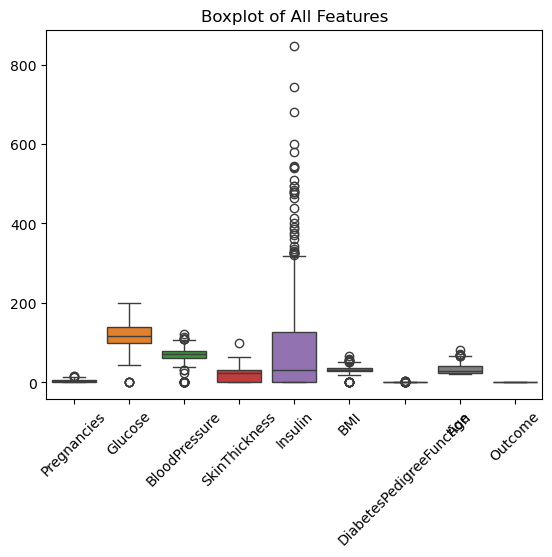

In [11]:
plt.figsize=(13,13)
sns.boxplot(data=df)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()

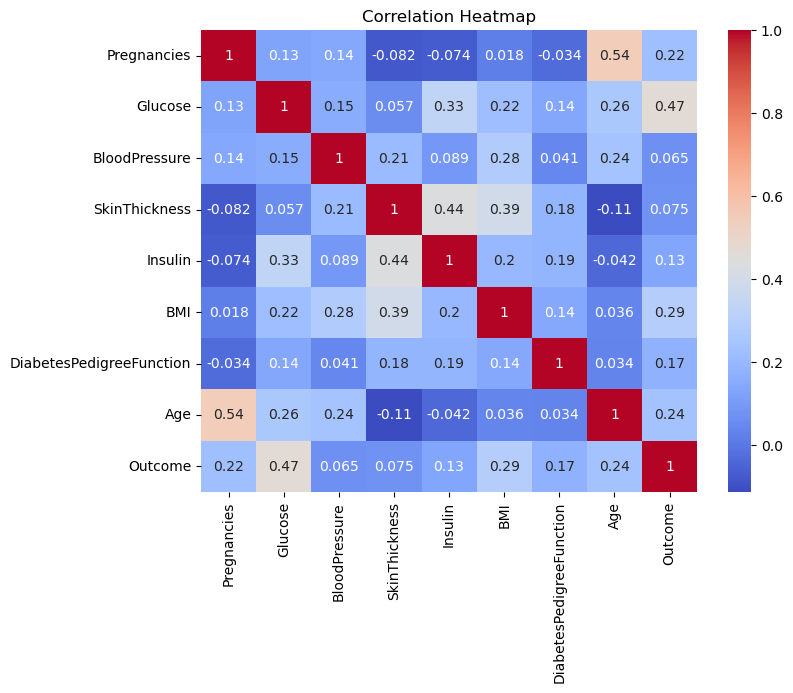

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

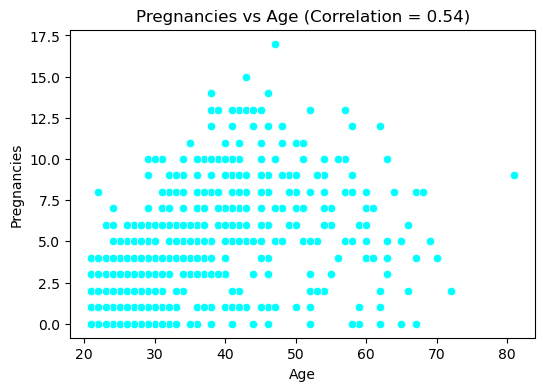

' the scatterplot shows a lot of dispersion.'

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age",y="Pregnancies",data=df,color="cyan")
plt.title("Pregnancies vs Age (Correlation = 0.54)")
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()
""" the scatterplot shows a lot of dispersion."""

                

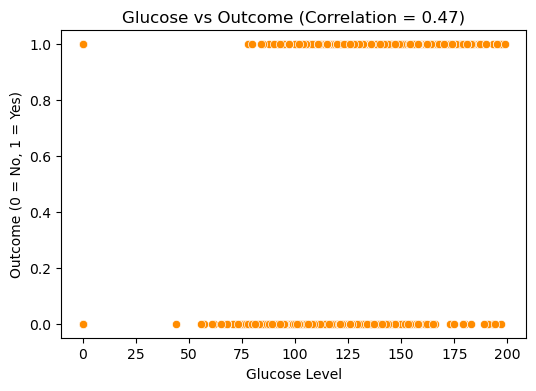

' A boxplot is better here, because they show how Glucose distribution differs for each Outcome group.'

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Glucose', y='Outcome', data=df, color='darkorange')
plt.title("Glucose vs Outcome (Correlation = 0.47)")
plt.xlabel("Glucose Level")
plt.ylabel("Outcome (0 = No, 1 = Yes)")
plt.show()
''' A boxplot is better here, because they show how Glucose distribution differs for each Outcome group.'''

C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_30424\3542297536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')


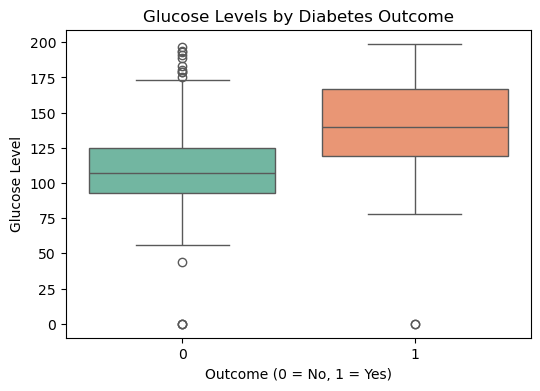

In [15]:
# Boxplot: Glucose vs Outcome (better than scatter for binary target)
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Outcome (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()


### DATA PREPROCESSING

1) This indicates some extreme or possibly incorrect readings in the non-diabetic group.
2) The 0 or near-0 glucose values are physiologically impossible — they likely represent missing or incorrectly recorded data.

In [16]:
# Count how many zeros in each column that shouldn't be zero
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")



Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [17]:
# Replace zeros with median of the column (excluding zeros)
for col in cols_with_zeros:
    median_val = df.loc[df[col] != 0, col].median()
    df[col] = df[col].replace(0, median_val)

C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_30424\3653858587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pregnancies', y='Age', data=df, palette='coolwarm')


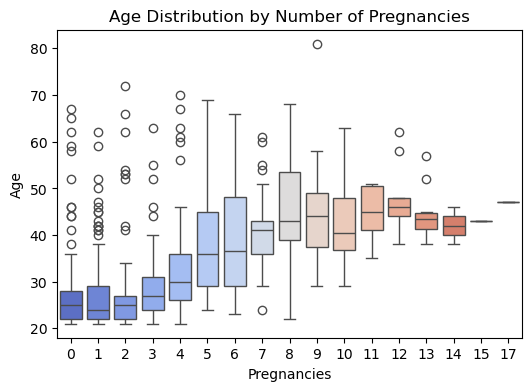

In [18]:
# Boxplot: Age vs Pregnancies
plt.figure(figsize=(6,4))
sns.boxplot(x='Pregnancies', y='Age', data=df, palette='coolwarm')
plt.title("Age Distribution by Number of Pregnancies")
plt.xlabel("Pregnancies")
plt.ylabel("Age")
plt.show()

In [19]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

print("IQR values:\n", IQR)

# Detect outliers count per column
for col in num_cols:
    lower_limit = Q1[col] - 1.5 * IQR[col]
    upper_limit = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col}: {outliers.shape[0]} outliers")


IQR values:
 Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
Insulin                      5.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
dtype: float64
Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 87 outliers
Insulin: 346 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


In [20]:
# OUTLIER TREATMENT
for col in num_cols:
    lower_limit = Q1[col] - 1.5 * IQR[col]
    upper_limit = Q3[col] + 1.5 * IQR[col]
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

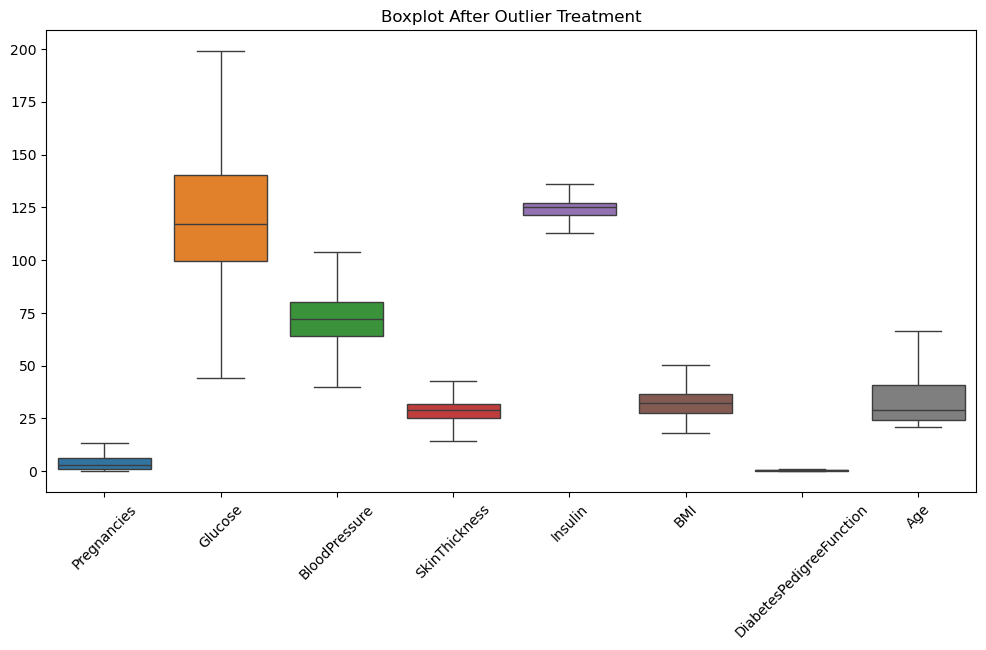

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

### MODEL BUILDING

In [22]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns='Outcome')
y = df['Outcome']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = log_reg.predict(X_test)



In [26]:
#y_prob = log_reg.predict_proba(X_test)

print('Training Accuracy : {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Testing Accuracy : {:.3f}'.format(log_reg.score(X_test, y_test)))

''' no severe overfitting.'''

Training Accuracy : 0.764
Testing Accuracy : 0.747


' no severe overfitting.'

### MODEL EVALUAION

In [27]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7467532467532467


In [28]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred,labels=[1,0]))


Confusion Matrix:
 [[35 20]
 [19 80]]


In [29]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

''' the model is better at predicting 0 than 1.'''


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



' the model is better at predicting 0 than 1.'

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
# Probabilities for positive class (Outcome = 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)
''' 0.827 → The model correctly distinguishes between diabetic and non-diabetic cases ~82.7% of the time.'''


ROC-AUC Score: 0.8269972451790634


' 0.827 → The model correctly distinguishes between diabetic and non-diabetic cases ~82.7% of the time.'

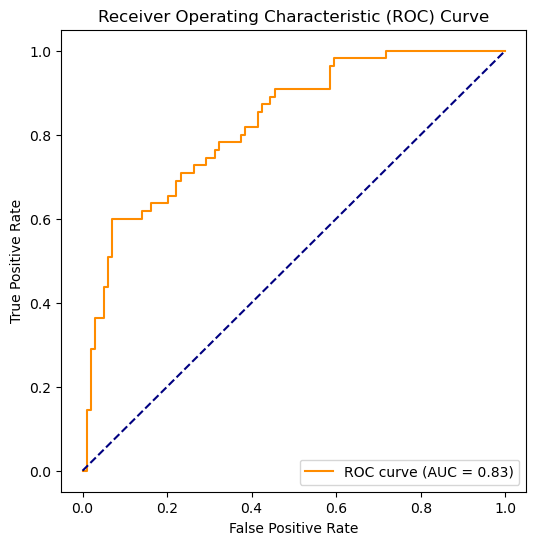

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

#  Interpretation

In [32]:
feature_names = X.columns

coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Impact": ["Increase ↑" if c > 0 else "Decrease ↓" for c in coefficients]
})

# Sort by absolute value (most important first)
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

print(coef_df)

                    Feature  Coefficient      Impact  Abs_Coefficient
1                   Glucose     0.993674  Increase ↑         0.993674
5                       BMI     0.654602  Increase ↑         0.654602
7                       Age     0.420672  Increase ↑         0.420672
6  DiabetesPedigreeFunction     0.246193  Increase ↑         0.246193
0               Pregnancies     0.207642  Increase ↑         0.207642
2             BloodPressure    -0.147826  Decrease ↓         0.147826
4                   Insulin     0.132157  Increase ↑         0.132157
3             SkinThickness     0.066832  Increase ↑         0.066832


In [ ]:
# Significance of Features in Predicting the Target Variable:

# Glucose → BMI → Age → Pedigree Function → Pregnancies
# These have the strongest positive influence on the probability of diabetes.

#Less important features include:
# BloodPressure, Insulin and SkinThickness
# These variables show weaker relationships and contribute little to the model.


#  Deployment with Streamlit

In [33]:
import joblib

# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(log_reg, "model.pkl")

print("Model and scaler saved!")

Model and scaler saved!


# Interview Questions:

In [34]:
'''
1. What is the difference between precision and recall?

Precision measures how many of the predicted positive cases are actually positive.

Formula: Precision = TP / (TP + FP)

Recall measures how many of the actual positive cases were correctly predicted.

Formula: Recall = TP / (TP + FN)

In simple terms:
- Precision focuses on correctness of positive predictions.
- Recall focuses on completeness of capturing actual positives.
'''

'\n1. What is the difference between precision and recall?\n\nPrecision measures how many of the predicted positive cases are actually positive.\n\nFormula: Precision = TP / (TP + FP)\n\nRecall measures how many of the actual positive cases were correctly predicted.\n\nFormula: Recall = TP / (TP + FN)\n\nIn simple terms:\n- Precision focuses on correctness of positive predictions.\n- Recall focuses on completeness of capturing actual positives.\n'

In [ ]:
''' 
2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique where the dataset is split into multiple folds (usually 5 or 10).
The model is trained on some folds and tested on the remaining fold, repeatedly.
Example: 5-fold cross validation → dataset is split into 5 equal parts.
Training happens 5 times, each time using a different fold as the test set.

Importance:
- It helps evaluate model performance more reliably.
- Reduces the risk of overfitting.
- Ensures the model generalizes well to unseen data.
- Gives a stable estimate of accuracy, precision, recall, and F1-score.

Cross-validation is especially useful in binary classification because it avoids biases
that may come from a single train-test split.

'''